## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Loading the data and having a look at the top few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Printing the shape attribute of the dataframe (df)
# will tell us the number of rows.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Unique user_id in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Number of times when group is not treatment but langing page is new page, and number of times when group is not control but langing page is old page
df.query('group!="treatment" and landing_page=="new_page"').count()[0] + df.query('group!="control" and landing_page=="old_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
# Check if rows have missing value
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There is no missing values in the dataset**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Dataframe where the treatment is NOT aligned with new_page or control is NOT aligned with old_page 
df2 = df[((df.group == 'treatment') & (df.landing_page =='new_page')) | ((df.group =='control') & (df.landing_page == 'old_page'))]

#  Make sure there are 290585 rows
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Unique user_id in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Find the duplicate user_id
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# The row information for the repeat user_id
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Now we remove one of the duplicate rows
df2 = df2.drop_duplicates(['user_id'], keep='first')
# Check agin if removal of one of the rows
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# The probability of an individual converting given that an individual was in the control group
df2[df2['group'] == "control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# The probability of an individual converting given that an individual was in the treatment group
df2[df2['group'] == "treatment"]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# The probability of individual received new page
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**According to above proportions, the control group is 0.1203863045004612, and treatment group is 0.11880806551510564. There is a small difference between them.
 and therefore we cannot conclude that the new treatment page leads to more conversions, So it is important to consider other factors.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H{0}$ : $p_{new}$ - $p_{old}$ <= 0**

**$H{1}$ : $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# The proportion of converted rate for p_new
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# The proportion of converted rate for p_old 
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# Number of users landing on new page
n_new = len(df2.query('landing_page == "new_page"'))
# Print n_new
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# Number of users landing on old page
n_old = len(df2.query('landing_page == "old_page"'))
# Print n_old
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1-p_new])
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1-p_old])
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# differences computed in from p_new and p_old
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs

0.00049766238657134032

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#Simulate 10000 samples of the differences in in p_new - p_old simulated values
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, 1-p_old])
    new_page_converted2 = new_page_converted.mean()
    old_page_converted2 = old_page_converted.mean()
    p_diffs.append(new_page_converted2 - old_page_converted2)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,0,'p_diffs')

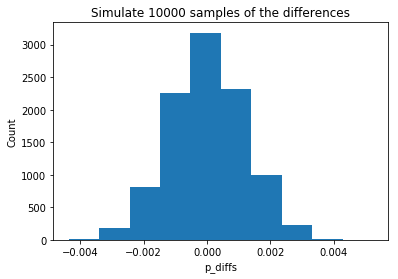

In [26]:
#histogram of the p_diffs
plt.hist(p_diffs)
#title of graphs
plt.title('Simulate 10000 samples of the differences')
# y-label of graphs
plt.ylabel('Count') 
# x-label of graphs
plt.xlabel('p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#Actual difference of converted rates
print("The actual_difference for the sampl statstic is ")
actual_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())
actual_diff

The actual_difference for the sampl statstic is 


-0.0015782389853555567

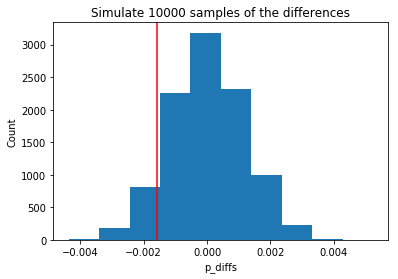

In [28]:
#histogram of p_diff
plt.hist(p_diffs);
#title of graphs
plt.title('Simulate 10000 samples of the differences')
# y-label of graphs
plt.ylabel('Count')
# x-label of graphs
plt.xlabel('p_diffs')

plt.axvline(x = actual_diff, color = 'r');

In [29]:
#Convert to numpy array and calculate the p-value
print("proportion of the p_diffs are greater than the actual difference")
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()

proportion of the p_diffs are greater than the actual difference


0.91379999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In this part, I can explain that our alternative hypothesis is p_new > p_old and the probability that our observed statistic comes from this distribution is by that red line. The value calculated is called p-value. So a very large p-value indicates weak evidence against the null hypothesis, which suggested that new-page is not doing significantly better than the old page. New page is worse than old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm

# Number of conversions for each page
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]

# Number of individuals who received each page
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

# To show the results
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
# I will modify the function parameter -alternative- from two-sided to smaller to achieve the alt hypotheses  new > old
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new ], [n_old, n_new], alternative='smaller')

In [32]:
z_score

1.3109241984234394

In [33]:
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**This is another test to make us dicide if we will accept or rejct the null. After doing the z_score test we can make sure that the p-value not higher than 0.95. Based on that we accept the null and reject the alterntive. and yest this findings agreed with part j & k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I will use the Logistic Regression due to the predict 1 of 2 possible outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Create intercept column
df2['intercept'] = 1 

# Create dummies
df2[['control', 'treatment']] = pd.get_dummies(df2['group']) 
#df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page']) 

# View the head to make sure the new columns are as supposed to be
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
# the output is categorical we will use the logit
import statsmodels.api as sm
logitR = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

# First i will make fit for it
results = logitR.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# then a summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-07 13:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page column is 0.19. However, the difference from part II is for the A/B test, the null hypotheses declare that the old page is better than the new page or as same as the new page which is a one-tailed test. On the other hand, the logistic regression determines only two possible outcomes.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In my opinion, if we add additional factories it might have a number of disadvantages. they may influence the conversions. The disadvantage is that we don't know that our additional factor will influence the result in which direction. As our additional factor changes every time on the basis of an additional factor.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# Store Countries.csv data in dataframe
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# I will use a (df3) to merge the additional columns
df3 = df2.merge(countries_df, how='inner', on='user_id')
# Check if the merge is correct
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [39]:
# Adding dummy variables
df3['intercept'] = 1
df3[['US', 'CA']] = pd.get_dummies(df3['country'])[['US', "CA"]]
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,1,0


In [40]:
# The output is categorical we will use the logit
import statsmodels.api as sm
logitR_df3 = sm.Logit(df3['converted'], df3[['intercept', 'US', 'CA']])
logitR_df3

# First i will make fit 
results = logitR_df3.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [41]:
# then a summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-07 13:15 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

**From the regression above we see that the p-value is higher in US than in Canada, which means that users in the US are more likely to convert, but still not enough evidence to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# make new column called group_country wich will merge the group and the country.
df3['group_country'] = df3['group'] + '_' + df3['country']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country,US,CA,group_country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,1,0,control_US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,1,0,control_US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,treatment_US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,treatment_US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,1,0,control_US


In [43]:
# Adding dummy variables
df3['intercept'] = 1
df3 = df3.join(pd.get_dummies(df3['group_country']))
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country,US,CA,group_country,control_CA,control_UK,control_US,treatment_CA,treatment_UK,treatment_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,1,0,control_US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,1,0,control_US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,treatment_US,0,0,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,treatment_US,0,0,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,1,0,control_US,0,0,1,0,0,0


In [49]:
# The output is categorical we will use the logit
import statsmodels.api as sm
logitR_df3 = sm.Logit(df3['converted'], df3[['intercept', 'US', 'CA', 'control_US', 'control_CA']])
logitR_df3

# First i will make fit 
results = logitR_df3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [50]:
# then a summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-07 13:38 AIC:              212780.8857
No. Observations:   290584           BIC:              212833.7840
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0202    0.0150    -1.3513  0.1766  -0.0496   0.0091
CA           -0.0846    0.0388    -2.1794  0.0293  -0.1608  -0.0085
control_US    0.0206    0.0137     1.5052  0.1323  -0.0062   0.0473
control_CA    0.0674    0.0520     1.2967  0.1947  -0.0345   0.1694
==================================================================

"""

**Conclusions: According to the analysis performed I found that the old page was better than the new page, therefore I fail to reject the null hypothesis. Moreover, the histogram shows that the new page is not better than the old page.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0